### Problem statement:

Build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [7]:
!pip install tensorflow

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

###  1. Import DataSet


In [4]:
# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/gdrive')

# Set the path to your dataset in Google Drive
#data_dir_train = pathlib.Path("/content/gdrive/MyDrive/SkincancerISICTheInternationalSkinImagingCollaboration/Train")  # Update the path accordingly
#data_dir_test = pathlib.Path("/content/gdrive/MyDrive/SkincancerISICTheInternationalSkinImagingCollaboration/Test")    # Update the path accordingly

data_dir_train = pathlib.Path("./SkinIcancer/Train")  # Update the path accordingly
data_dir_test = pathlib.Path("./SkinIcancer/Test")    # Update the path accordingly



# Count the number of images in training and testing sets
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f"Training images: {image_count_train}, Testing images: {image_count_test}")


Training images: 2239, Testing images: 118


### 2. Dataset Creation
Once Google Drive is mounted and paths are defined, you can proceed to create your train and validation datasets as usual. The following code remains mostly unchanged except for the dataset paths:


In [5]:
# Set parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

# Create train dataset (80% of the images) with image resizing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Create validation dataset (20% of the images) with image resizing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Display the class names
class_names = train_ds.class_names
print(f"Classes: {class_names}")


Found 11239 files belonging to 9 classes.
Using 8992 files for training.
Found 11239 files belonging to 9 classes.
Using 2247 files for validation.
Classes: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### 3. Dataset Visualization


2024-09-21 09:15:06.298282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


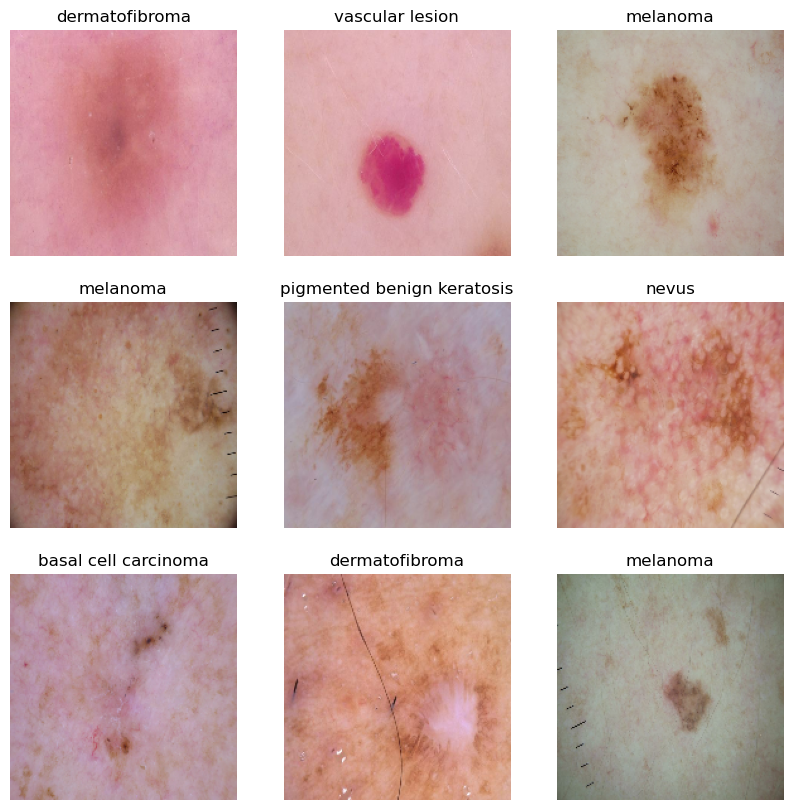

In [4]:
# Visualize an image from each class
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


### 4. Model Building and Training

Code to build the CNN model:



In [5]:
# Model architecture with the correct Rescaling layer
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Use layers.Rescaling
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')  # Adjust for your 9 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

Code to train the model:




In [6]:
# Train the model
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.1559 - loss: 2.2371 - val_accuracy: 0.4009 - val_loss: 1.7296
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.3562 - loss: 1.7315 - val_accuracy: 0.4610 - val_loss: 1.4372
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.4274 - loss: 1.4987 - val_accuracy: 0.4699 - val_loss: 1.3895
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 9665s 58s/step - accuracy: 0.4733 - loss: 1.4087 - val_accuracy: 0.5160 - val_loss: 1.2698
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.5066 - loss: 1.2742 - val_accuracy: 0.5694 - val_loss: 1.1629
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.5470 - loss: 1.1938 - val_accuracy: 0.5226 - val_loss: 1.2380
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 2146s 13s/step - accuracy: 0.5731 - loss: 1.0972 - val_accuracy: 0.6058 - val_loss: 1.0802
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 2147s 13s/step - accuracy: 0.6224 - loss: 1.0154 - va

### 5. Visualizing Training Results


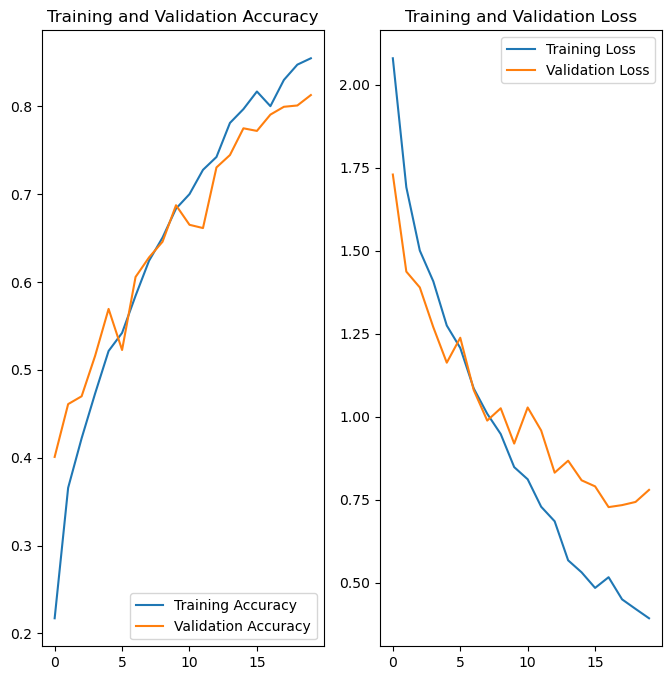

In [7]:
# Plot training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Observation from the plotted graph with 20 epochs


1. Training and Validation Accuracy Over Epochs:

a) The training accuracy consistently increases from around 20% to about 90%. The validation accuracy follows a similar pattern, although it fluctuates slightly, showing some overfitting toward the later epochs (around epoch 15-17), where the training accuracy keeps increasing, but validation accuracy plateaus or drops slightly.
b) This behavior indicates that the model is learning well but starts to slightly overfit toward the end of training.

2. Training and Validation Loss Over Epochs:

a) The training loss decreases rapidly, indicating that the model is learning quickly. However, there are some fluctuations in the validation loss, suggesting that the model is having difficulty generalizing well to the validation data after a certain point.
b) The validation loss starts to diverge slightly from the training loss after epoch 10, which indicates the beginning of overfitting.

3. Observations on Overfitting/Underfitting:

a) There are signs of overfitting toward the later epochs. While training accuracy continues to increase, validation accuracy stagnates, and validation loss fluctuates. This indicates that the model is beginning to memorize the training data and not generalizing well to unseen data.
b) The sharp decline in training loss without a corresponding decline in validation loss reinforces this observation.




### 6. Data Augmentation


2024-09-26 07:39:41.043434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


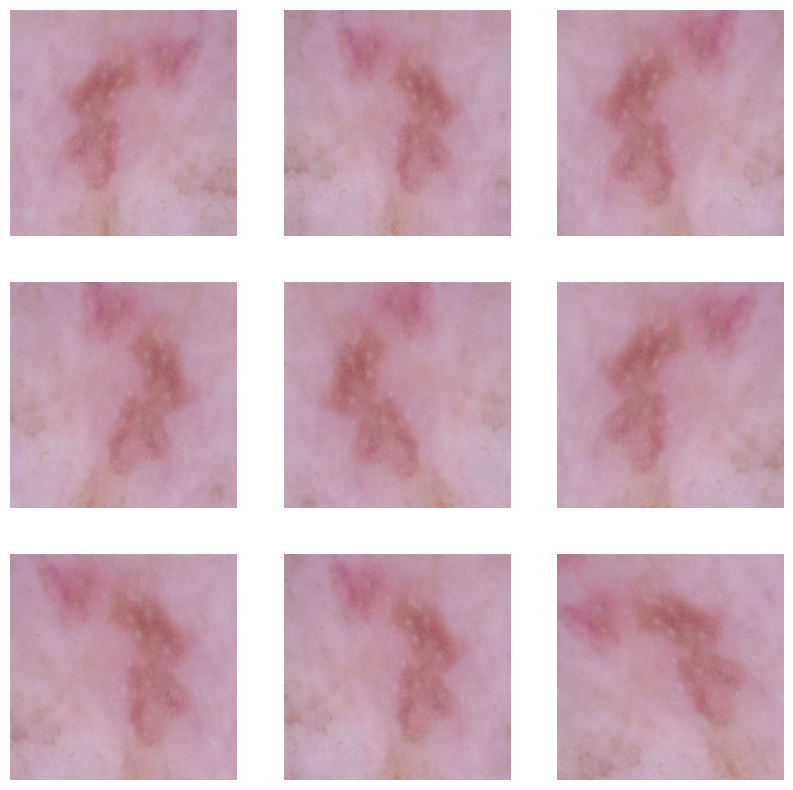

In [8]:
### 6. Data Augmentation
### 6. Data Augmentation
### 6. Data Augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

# Define the data augmentation pipeline without the 'experimental' namespace
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

# Visualize Data Augmentation
for image, _ in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")


### 7. Class Distribution and Handling Class Imbalance


2024-09-26 07:43:18.569449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


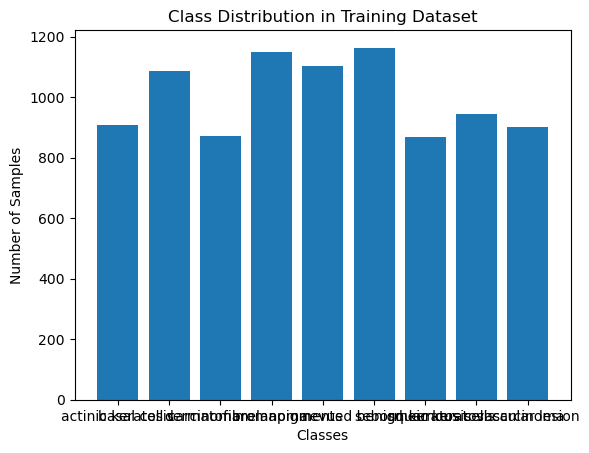

Class with least samples: seborrheic keratosis
Class with most samples: pigmented benign keratosis


In [11]:
### Check class distribution
labels = []
for _, label in train_ds:
    labels.append(label.numpy())

labels = np.concatenate(labels)
unique, counts = np.unique(labels, return_counts=True)

plt.bar(class_names, counts)
plt.title('Class Distribution in Training Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.show()

### Identify class with the least and most samples
print(f"Class with least samples: {class_names[np.argmin(counts)]}")
print(f"Class with most samples: {class_names[np.argmax(counts)]}")


### Identify class with the least and most samples


In [13]:
print(f"Class with least samples: {class_names[np.argmin(counts)]}")
print(f"Class with most samples: {class_names[np.argmax(counts)]}")

Class with least samples: seborrheic keratosis
Class with most samples: pigmented benign keratosis


### 8. Handling Class Imbalance with Augmentor:



In [10]:
!pip install Augmentor
import Augmentor

# Augment images for underrepresented classes
for class_name in class_names:
    p = Augmentor.Pipeline(str(data_dir_train / class_name))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  # Adding 500 new samples to each class


Initialised with 114 image(s) found.
Output directory set to SkinIcancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14F613D50>: 100%|█|


Initialised with 376 image(s) found.
Output directory set to SkinIcancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14F74ADD0>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to SkinIcancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14E18FE10>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to SkinIcancer/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=722x542 at 0x14F446550>: 100%|█|


Initialised with 357 image(s) found.
Output directory set to SkinIcancer/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x1


Initialised with 462 image(s) found.
Output directory set to SkinIcancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14F2B0090>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to SkinIcancer/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 181 image(s) found.
Output directory set to SkinIcancer/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 139 image(s) found.
Output directory set to SkinIcancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14F5FD990>: 100%|█|


### 9. Rebuilding the Model and Training on Augmented Data


Recreate the train dataset with augmented images:



In [11]:
# Re-create the dataset with augmented images
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 11239 files belonging to 9 classes.
Using 8992 files for training.
Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


### Rebuild the model and train for 30 epochs:



In [12]:
# Rebuild and train the model
epochs = 30
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)



Epoch 1/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 483s 2s/step - accuracy: 0.8067 - loss: 0.5930 - val_accuracy: 0.8883 - val_loss: 0.3678
Epoch 2/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 1018s 4s/step - accuracy: 0.8247 - loss: 0.5087 - val_accuracy: 0.8936 - val_loss: 0.3303
Epoch 3/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 375s 1s/step - accuracy: 0.8531 - loss: 0.4136 - val_accuracy: 0.8994 - val_loss: 0.2995
Epoch 4/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 869s 3s/step - accuracy: 0.8582 - loss: 0.3896 - val_accuracy: 0.8994 - val_loss: 0.2925
Epoch 5/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 505s 2s/step - accuracy: 0.8693 - loss: 0.3520 - val_accuracy: 0.9065 - val_loss: 0.2921
Epoch 6/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 435s 2s/step - accuracy: 0.8640 - loss: 0.3836 - val_accuracy: 0.9101 - val_loss: 0.2618
Epoch 7/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.8871 - loss: 0.2968 - val_accuracy: 0.9105 - val_loss: 0.3075
Epoch 8/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 1360s 5s/step - accuracy: 0.8848 - loss: 0.3164 - val_ac

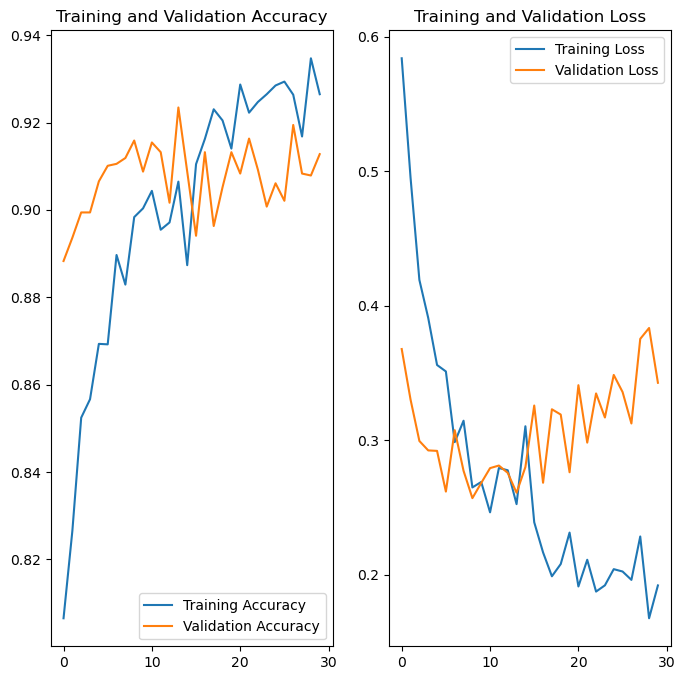

In [13]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Observation from above graph with 30 epochs and Class Augmented Data

1. Training and Validation Accuracy Over Epochs:

a)After 30 epochs of training, the training accuracy reaches about 94%, while the validation accuracy stays around 91%. The gap between the training and validation accuracy is small, indicating that the model generalizes well after the additional epochs.
b) The sharp jumps in validation accuracy may indicate noise or that the model is still sensitive to validation. data, but overall the improvement is stable.

2. Training and Validation Loss Over Epochs:

a) After applying data augmentation and rebalancing, the validation loss starts lower and fluctuates less than in the first plot. The training loss keeps decreasing steadily and reaches a much lower value compared to the first plot.
b) However, the fluctuations in validation loss near the end indicate that the model may still be struggling with some degree of overfitting.

3. Observations on Overfitting/Underfitting:

a)The second set of plots show clear improvement after applying data augmentation and class rebalancing:
The training and validation accuracies are much closer, indicating better generalization.
b) Validation loss is lower overall, though it still fluctuates toward the end, suggesting that there is still some potential for improvement in generalization.
c) The gap between training and validation accuracy has decreased compared to the first training run, implying less overfitting.




### 10. Final Analysis:

1) Data Augmentation Impact:

Data augmentation has likely helped the model generalize better to unseen data, as indicated by the improvement in validation accuracy and reduction in the gap between training and validation performance.
Augmentation strategies such as random flipping, rotation, and zooming have helped introduce variability into the training data, which has reduced overfitting.

2) Class Rebalancing Impact:

The class rebalancing has also helped improve the model's performance, particularly in preventing overfitting on dominant classes. The more balanced dataset ensures that the model doesn't focus too heavily on any one class, leading to better overall generalization.

3) Remaining Issues:

Although the model has improved after augmentation and rebalancing, there are still signs of overfitting toward the later epochs. Validation loss fluctuates, and there are some sharp jumps in validation accuracy, which could be due to noise or the sensitivity of the model to certain validation samples.
Further regularization techniques, such as early stopping or stronger dropout, might help in stabilizing validation performance and reducing overfitting even more.


### Recommendations:
    
1) Apply Early Stopping:

Early stopping can be used to monitor validation loss and halt training when the loss stops improving, preventing further overfitting.

2) Tune Dropout Rates:

Adjusting the dropout rate (currently at 0.5) might help reduce overfitting further by making the model less sensitive to the training data and encouraging it to learn more robust features.

3) Experiment with Learning Rate:

A learning rate scheduler could also be useful in improving generalization by slowing down learning as the training progresses.

### Conclusion:

After augmentation and rebalancing, the model has improved significantly in terms of generalization and accuracy. However, there are still small signs of overfitting, and applying early stopping, fine-tuning dropout, or using learning rate scheduling could help reduce this further.